In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

## Load data

In [2]:
from helper import load_data, normalize_data

data = load_data()

### Initialize your cluster centers

In [3]:
def initialize_clusters(data, k):
    """initialize the k cluster centers (the means).
    input:
        data: original data with shape (num_sample, num_feature).
        k: predefined number of clusters for the k-means algorithm.
    output:
        a numpy array with shape (k, num_feature)
    """
    # ***************************************************************************************************
    # INSERT YOUR CODE HERE
    # TODO: initialize cluster centers.
    # TODO: Make sure you choose k clusters from the data itself,
    #       or ensure otherwise that your initializations have the same scaling as the data
    # ***************************************************************************************************
    
    idx = np.random.randint(data.shape[0], size=k)
    clusters = data[idx,:]
    return clusters #np.array([[1,80],[5,50]])

In [4]:
data.shape

(272, 2)

In [5]:
# clusters = initialize_clusters(data,3)

### Update k-means parameters

#### Build distance matrix
Build a distance matrix, collecting the distances of the original dataset to the means of the clusters.

NOTE: once you finish your `build_distance_matrix`, please copy the function to the `helper.py` function. Otherwise, the `kmeans` function will not work.

In [6]:
# print(clusters.shape)
# for i, cluster_center in enumerate(clusters):
#     print(i, cluster_center)

In [7]:
def build_distance_matrix(data, mu):
    """build a distance matrix.
    return
        distance matrix:
            row of the matrix represents the data point,
            column of the matrix represents the k-th cluster.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: build distance matrix
    # ***************************************************
    distances = np.zeros((data.shape[0], mu.shape[0]))
    distance_matrix = np.zeros((data.shape[0], mu.shape[0]))
    for i, cluster_center in enumerate(mu):
        diff = data-np.ones((data.shape[0],1))*cluster_center
        distances[:,i] = np.linalg.norm(diff, axis=1)
    return distances

In [8]:
# build_distance_matrix(data,clusters)

#### Update k-means parameters

In [9]:
# mu = np.zeros(clusters.shape)
# mu.shape
# mu_nominator = np.zeros(mu.shape)
# print(mu_nominator)
# mu_denominator = np.zeros((mu.shape[0]))
# mu_denominator

In [10]:
def update_kmeans_parameters(data, mu_old):
    """update the parameter of kmeans
    return:
        losses: loss of each data point with shape (num_sample, 1)
        assignments: assignments vector z with shape (num_shapes, 1)
        mu: mean vector mu with shape (k, num_features) (3,2)
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: update kmeans parameters
    # ***************************************************
    distances = build_distance_matrix(data, mu_old)
    assignments = np.array([np.argmin(distances, axis=1)]).T
    losses = np.zeros((data.shape[0], 1))
    mu = np.zeros(mu_old.shape)
    mu_nominator = np.zeros(mu_old.shape)
    mu_denominator = np.zeros((mu_old.shape[0]))
    for i, k_th in enumerate(assignments):
        losses[i] = distances[i,k_th[0]]
        mu_nominator[k_th] += data[i]
        mu_denominator[k_th] += 1

    for i in range(mu_old.shape[0]):
        mu[i] = mu_nominator[i]/mu_denominator[i]

    return losses, assignments, mu

In [11]:
# update_kmeans_parameters(data,clusters)

#### Play with k-means

The current iteration of k-means is: 0,                the average loss is 8.575248551822623.


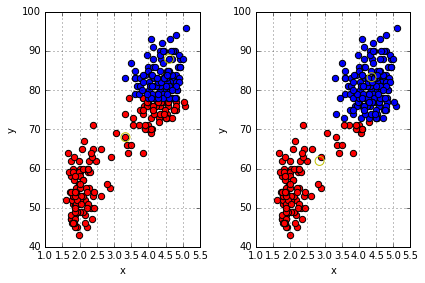

The current iteration of k-means is: 1,                the average loss is 5.9975562211870415.


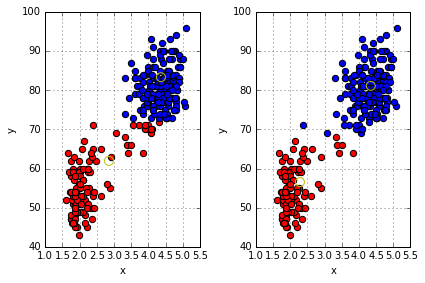

The current iteration of k-means is: 2,                the average loss is 4.825244167521961.


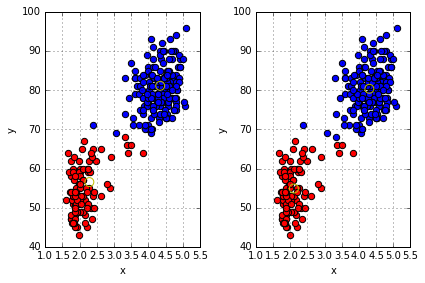

The current iteration of k-means is: 3,                the average loss is 4.686722544208671.


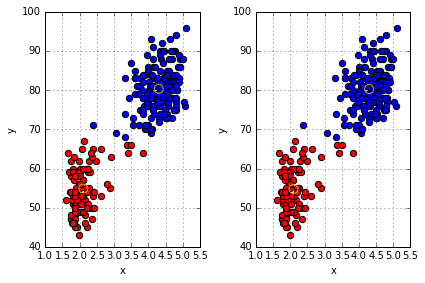

The current iteration of k-means is: 4,                the average loss is 4.68244411160236.


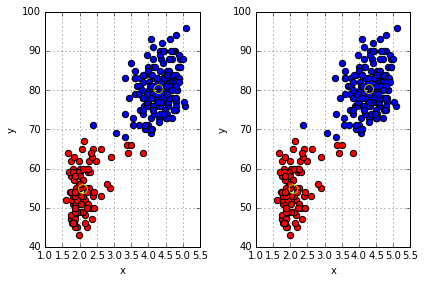

The current iteration of k-means is: 5,                the average loss is 4.68244411160236.


In [12]:
from helper import build_dir
from plots import plot

def kmeans(data, k, max_iters, threshold):
    """run the k-means algorithm."""
    output_figure = "kmeans_figures/"
    # initialize the cluster.
    mu_old = initialize_clusters(data, k)
    # init some empty lists to store the result.
    loss_list = []

    # start the kmeans algorithm.
    for iter in range(max_iters):
        # update z and mu
        losses, assignments, mu = update_kmeans_parameters(data, mu_old)
        # calculate the average loss over all points
        average_loss = np.mean(losses)
        loss_list.append(average_loss)
        print("The current iteration of k-means is: {i}, \
               the average loss is {l}.".format(i=iter, l=average_loss))
        # check converge
        if iter > 0 and np.abs(loss_list[-1] - loss_list[-2]) < threshold:
            break
        # output plot
        plot(data, mu, mu_old, output_figure + "kmean_iter{i}".format(i=iter))
        # update k-means information.
        mu_old = mu

# define parameters
k = 2
max_iters = 10
threshold = 1e-5
output_figure = "kmeans_figures/"

# build figure dir
build_dir(output_figure)

# run kmeans algorithm
kmeans(data, k, max_iters, threshold)

## Using k-means for image compresson

#### load image

In [13]:
from helper import load_image

image_path = "mandrill.png"
original_image = load_image(image_path)
print(
    "Original image: the shape of image={s}, the data type={dt}.".format(
        s=original_image.shape, dt=original_image.dtype))

Original image: the shape of image=(480, 480, 3), the data type=uint8.


#### preprocess image

In [36]:
def preprocess_image(original_image):
    """preprocess the image."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: vectorize and normalize the original_image.
    # ***************************************************
#     processed_image = np.zeros((original_image.shape[0], original_image.shape[2]))
#     processed_image[:,0] = original_image[:,0,0]*original_image[0,:,0]
#     processed_image[0,:] = original_image[0,0,:]
#     processed_image = np.zeros((original_image.shape[0]*original_image.shape[2], original_image.shape[1]))
#     processed_image = original_image.flatten().reshape(original_image.shape[0]*original_image.shape[2], original_image.shape[1]) 
#     processed_image = processed_image / np.linalg.norm(processed_image)
    w, h, d = original_shape = tuple(original_image.shape)
    processed_image = np.reshape(original_image, (w * h, d))
    norm = np.linalg.norm(processed_image)
    processed_image = processed_image / norm
    return processed_image

processed_image = preprocess_image(original_image)

In [30]:
print(processed_image.shape)
print(processed_image)

(230400, 3)
[[  1.37133835e-03   1.27525732e-03   6.11424743e-04]
 [  5.59016908e-04   4.54201238e-04   2.27100619e-04]
 [  6.37628661e-04   4.10528042e-04   1.04815670e-04]
 ..., 
 [  5.24078351e-05   9.60810311e-05   6.98771135e-05]
 [  6.11424743e-05   6.98771135e-05   4.36731959e-05]
 [  6.11424743e-05   6.11424743e-05   4.36731959e-05]]


In [44]:
from scipy import misc

The current iteration of k-means is: 0,                the average loss is 0.00046120376576963275.
The current iteration of k-means is: 1,                the average loss is 0.000421109651760571.
The current iteration of k-means is: 2,                the average loss is 0.0004078661276790464.
The current iteration of k-means is: 3,                the average loss is 0.0003921845722752681.
The current iteration of k-means is: 4,                the average loss is 0.00037858232006676896.
The current iteration of k-means is: 5,                the average loss is 0.0003675126623218876.
The current iteration of k-means is: 6,                the average loss is 0.000359460600671947.
The current iteration of k-means is: 7,                the average loss is 0.000354551547699481.
The current iteration of k-means is: 8,                the average loss is 0.0003512578788567832.
The current iteration of k-means is: 9,                the average loss is 0.0003480082475716949.
The current iteration

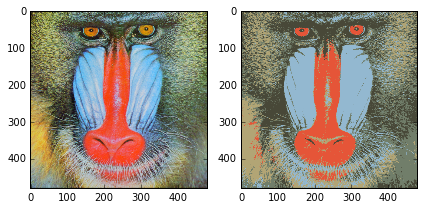

In [47]:
from plots import plot_image_compression


def kmean_compression(original_image, processed_image, k, max_iters, threshold):
    """using k-means for image compression."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: use kmean to compress the image.
    # *************************************************** 
    mu_old = initialize_clusters(processed_image, k)
    # init some empty lists to store the result.
    loss_list = []

    # start the kmeans algorithm.
    for iter in range(max_iters):
        # update z and mu
        losses, assignments, mu = update_kmeans_parameters(processed_image, mu_old)
        # calculate the average loss over all points
        average_loss = np.mean(losses)
        loss_list.append(average_loss)
        print("The current iteration of k-means is: {i}, \
               the average loss is {l}.".format(i=iter, l=average_loss))
        # check converge
        if iter > 0 and np.abs(loss_list[-1] - loss_list[-2]) < threshold:
            break
        # update k-means information.
        mu_old = mu

    w, h, d = original_shape = tuple(original_image.shape)
    p_image = np.reshape(original_image, (w * h, d))
    norm = np.linalg.norm(p_image)
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = mu[assignments[label_idx]] * norm
            label_idx += 1
    processed_image = image.astype('uint8')
    # plot histgram
    misc.imsave('mandril_k.png', processed_image)
    plot_image_compression(original_image, processed_image, assignments, mu, k)

# define parameters
k = 5
max_iter = 100
threshold = 1e-6

# use kmeans to compress image
kmean_compression(original_image, processed_image, k, max_iter, threshold)